In [1]:
import os
import numpy
import pandas

In [2]:
import glob
#files=glob.glob("*.?.??.txt")
files=glob.glob("TCGA_Glioma_HERV52/*.m.CT.tri.txt")
print(len(files))
files[:10]

40


['TCGA_Glioma_HERV52/TCGA-06-0124-01A.m.CT.tri.txt',
 'TCGA_Glioma_HERV52/TCGA-02-2485-10A.m.CT.tri.txt',
 'TCGA_Glioma_HERV52/TCGA-06-0744-01A.m.CT.tri.txt',
 'TCGA_Glioma_HERV52/TCGA-06-0648-01A.m.CT.tri.txt',
 'TCGA_Glioma_HERV52/TCGA-06-0152-10A.m.CT.tri.txt',
 'TCGA_Glioma_HERV52/TCGA-06-0128-10A.m.CT.tri.txt',
 'TCGA_Glioma_HERV52/TCGA-06-0211-01A.m.CT.tri.txt',
 'TCGA_Glioma_HERV52/TCGA-06-0145-01A.m.CT.tri.txt',
 'TCGA_Glioma_HERV52/TCGA-06-0686-10A.m.CT.tri.txt',
 'TCGA_Glioma_HERV52/TCGA-06-0221-01A.m.CT.tri.txt']

In [3]:
df=pandas.DataFrame(columns=['chr','position','tri'])
a=0
for file in files:
    a+=1
    print( str(a) + "/" + str(len(files)) + " : " + file)
    r=pandas.read_table(file,header=None,names=('chr','position','tri')).sort_values(['chr','position'])
    r.loc[0,'d_prev'] = -1
    r.loc[len(r)-1,'d_next']  = -1

    for i in range(1, len(r)): # range is not inclusive of the last number
        r.loc[i,'d_prev'] = r.loc[i,'position'] - r.loc[i-1,'position']

    for i in range(0, len(r)-1): # range is not inclusive of the last number
        r.loc[i,'d_next'] = r.loc[i+1,'position'] - r.loc[i,'position']

    clusters=r.query('d_prev > 0 and d_prev < 40 and d_next > 0 and d_next < 40')
    
    del r 
    # If don't delete or reset r, get warning next loop when setting 'd_prev' values ...
    #
    #/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
    #A value is trying to be set on a copy of a slice from a DataFrame.
    #Try using .loc[row_indexer,col_indexer] = value instead
    #
    #See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
    
    clusters.drop(columns=['d_prev','d_next'],inplace=True)
    clusters[os.path.basename(file)]=1
    df=pandas.merge(df,clusters,how='outer')

df.fillna(0,inplace=True)

1/40 : TCGA_Glioma_HERV52/TCGA-06-0124-01A.m.CT.tri.txt
2/40 : TCGA_Glioma_HERV52/TCGA-02-2485-10A.m.CT.tri.txt
3/40 : TCGA_Glioma_HERV52/TCGA-06-0744-01A.m.CT.tri.txt
4/40 : TCGA_Glioma_HERV52/TCGA-06-0648-01A.m.CT.tri.txt
5/40 : TCGA_Glioma_HERV52/TCGA-06-0152-10A.m.CT.tri.txt
6/40 : TCGA_Glioma_HERV52/TCGA-06-0128-10A.m.CT.tri.txt
7/40 : TCGA_Glioma_HERV52/TCGA-06-0211-01A.m.CT.tri.txt
8/40 : TCGA_Glioma_HERV52/TCGA-06-0145-01A.m.CT.tri.txt
9/40 : TCGA_Glioma_HERV52/TCGA-06-0686-10A.m.CT.tri.txt
10/40 : TCGA_Glioma_HERV52/TCGA-06-0221-01A.m.CT.tri.txt
11/40 : TCGA_Glioma_HERV52/TCGA-06-0125-01A.m.CT.tri.txt
12/40 : TCGA_Glioma_HERV52/TCGA-06-0208-10A.m.CT.tri.txt
13/40 : TCGA_Glioma_HERV52/TCGA-06-0157-10A.m.CT.tri.txt
14/40 : TCGA_Glioma_HERV52/TCGA-06-0214-01A.m.CT.tri.txt
15/40 : TCGA_Glioma_HERV52/TCGA-06-0210-01A.m.CT.tri.txt
16/40 : TCGA_Glioma_HERV52/TCGA-06-0171-01A.m.CT.tri.txt
17/40 : TCGA_Glioma_HERV52/TCGA-02-2483-01A.m.CT.tri.txt
18/40 : TCGA_Glioma_HERV52/TCGA-06-0157-

In [4]:
df.head()

,chr,position,tri,TCGA-06-0124-01A.m.CT.tri.txt,TCGA-02-2485-10A.m.CT.tri.txt,TCGA-06-0744-01A.m.CT.tri.txt,TCGA-06-0648-01A.m.CT.tri.txt,TCGA-06-0152-10A.m.CT.tri.txt,TCGA-06-0128-10A.m.CT.tri.txt,TCGA-06-0211-01A.m.CT.tri.txt,...,TCGA-06-0155-10A.m.CT.tri.txt,TCGA-06-0155-01B.m.CT.tri.txt,TCGA-02-2485-01A.m.CT.tri.txt,TCGA-06-0744-10A.m.CT.tri.txt,TCGA-06-0124-10A.m.CT.tri.txt,TCGA-06-0185-01A.m.CT.tri.txt,TCGA-06-0145-10A.m.CT.tri.txt,TCGA-06-0152-01A.m.CT.tri.txt,TCGA-06-0211-10A.m.CT.tri.txt,TCGA-06-0128-01A.m.CT.tri.txt
0,chr10,58718769,GCG,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,chr10,110561745,ACG,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,chr14,39653222,ACA,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,chr14,81639644,GCG,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr14_GL000194v1_random,189962,ACG,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.index=df['chr']+':'+df['position'].astype(str)
df.head()

,chr,position,tri,TCGA-06-0124-01A.m.CT.tri.txt,TCGA-02-2485-10A.m.CT.tri.txt,TCGA-06-0744-01A.m.CT.tri.txt,TCGA-06-0648-01A.m.CT.tri.txt,TCGA-06-0152-10A.m.CT.tri.txt,TCGA-06-0128-10A.m.CT.tri.txt,TCGA-06-0211-01A.m.CT.tri.txt,...,TCGA-06-0155-10A.m.CT.tri.txt,TCGA-06-0155-01B.m.CT.tri.txt,TCGA-02-2485-01A.m.CT.tri.txt,TCGA-06-0744-10A.m.CT.tri.txt,TCGA-06-0124-10A.m.CT.tri.txt,TCGA-06-0185-01A.m.CT.tri.txt,TCGA-06-0145-10A.m.CT.tri.txt,TCGA-06-0152-01A.m.CT.tri.txt,TCGA-06-0211-10A.m.CT.tri.txt,TCGA-06-0128-01A.m.CT.tri.txt
chr10:58718769,chr10,58718769,GCG,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
chr10:110561745,chr10,110561745,ACG,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
chr14:39653222,chr14,39653222,ACA,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
chr14:81639644,chr14,81639644,GCG,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr14_GL000194v1_random:189962,chr14_GL000194v1_random,189962,ACG,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df=df.transpose()
df.head()

,chr10:58718769,chr10:110561745,chr14:39653222,chr14:81639644,chr14_GL000194v1_random:189962,chr20:61647540,chr3:135535998,chr3:135536000,chr4:11658768,chr4:64406161,...,chr13:29788884,chr3:185558036,chr3:185558038,chr4:108741307,chr4:108741309,chr4:108741311,chr4:169482289,chr5:79460020,chr8:98456623,chr9:74817355
chr,chr10,chr10,chr14,chr14,chr14_GL000194v1_random,chr20,chr3,chr3,chr4,chr4,...,chr13,chr3,chr3,chr4,chr4,chr4,chr4,chr5,chr8,chr9
position,58718769,110561745,39653222,81639644,189962,61647540,135535998,135536000,11658768,64406161,...,29788884,185558036,185558038,108741307,108741309,108741311,169482289,79460020,98456623,74817355
tri,GCG,ACG,ACA,GCG,ACG,CCC,GCG,GCG,CCT,GCG,...,GCA,ACA,ACA,GCG,GCG,GCG,TCT,TCT,TCT,TCT
TCGA-06-0124-01A.m.CT.tri.txt,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-02-2485-10A.m.CT.tri.txt,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df['tn']='normal'
df.loc[df.index.str.match('.{12}-01.*'),'tn'] = 'tumor'
df['tn'].head()

chr                              normal
position                         normal
tri                              normal
TCGA-06-0124-01A.m.CT.tri.txt     tumor
TCGA-02-2485-10A.m.CT.tri.txt    normal
Name: tn, dtype: object

In [8]:
# irrelevant here
#df['transition']='CT'
#df.loc[df.index.str.match('.*\.GA\.tri\.txt'),'transition'] = 'GA'
#df['transition'].head()

In [9]:
# irrelevant here
#df['caller']='consensus'
#df.loc[df.index.str.match('.*\.m\...\.tri\.txt'),'caller'] = 'multiallelic'
#df['caller'].head()

In [10]:
# irrelevant here
#df['subject'] = df.index.str[0:12]
#df['subject'].head()

In [11]:
len(df)

43

In [12]:
len(df.columns)

1540

In [13]:
df.head()

,chr10:58718769,chr10:110561745,chr14:39653222,chr14:81639644,chr14_GL000194v1_random:189962,chr20:61647540,chr3:135535998,chr3:135536000,chr4:11658768,chr4:64406161,...,chr3:185558036,chr3:185558038,chr4:108741307,chr4:108741309,chr4:108741311,chr4:169482289,chr5:79460020,chr8:98456623,chr9:74817355,tn
chr,chr10,chr10,chr14,chr14,chr14_GL000194v1_random,chr20,chr3,chr3,chr4,chr4,...,chr3,chr3,chr4,chr4,chr4,chr4,chr5,chr8,chr9,normal
position,58718769,110561745,39653222,81639644,189962,61647540,135535998,135536000,11658768,64406161,...,185558036,185558038,108741307,108741309,108741311,169482289,79460020,98456623,74817355,normal
tri,GCG,ACG,ACA,GCG,ACG,CCC,GCG,GCG,CCT,GCG,...,ACA,ACA,GCG,GCG,GCG,TCT,TCT,TCT,TCT,normal
TCGA-06-0124-01A.m.CT.tri.txt,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,tumor
TCGA-02-2485-10A.m.CT.tri.txt,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,normal


In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

X = df.drop(['chr','position','tri']).drop(columns=['tn']) #,'transition','caller','subject'])
y = df.drop(['chr','position','tri']).tn

In [16]:
X.head()

,chr10:58718769,chr10:110561745,chr14:39653222,chr14:81639644,chr14_GL000194v1_random:189962,chr20:61647540,chr3:135535998,chr3:135536000,chr4:11658768,chr4:64406161,...,chr13:29788884,chr3:185558036,chr3:185558038,chr4:108741307,chr4:108741309,chr4:108741311,chr4:169482289,chr5:79460020,chr8:98456623,chr9:74817355
TCGA-06-0124-01A.m.CT.tri.txt,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-02-2485-10A.m.CT.tri.txt,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-06-0744-01A.m.CT.tri.txt,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-06-0648-01A.m.CT.tri.txt,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-06-0152-10A.m.CT.tri.txt,1,1,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y.head()

TCGA-06-0124-01A.m.CT.tri.txt     tumor
TCGA-02-2485-10A.m.CT.tri.txt    normal
TCGA-06-0744-01A.m.CT.tri.txt     tumor
TCGA-06-0648-01A.m.CT.tri.txt     tumor
TCGA-06-0152-10A.m.CT.tri.txt    normal
Name: tn, dtype: object

In [18]:
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_pred = logreg.predict(X)
y_pred

array(['tumor', 'normal', 'tumor', 'tumor', 'normal', 'normal', 'tumor',
       'tumor', 'normal', 'tumor', 'tumor', 'normal', 'normal', 'tumor',
       'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'normal',
       'tumor', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'tumor', 'tumor', 'normal',
       'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor'],
      dtype=object)

In [20]:
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred))

1.0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [22]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_pred = logreg.predict(X_test)

In [24]:
print(metrics.accuracy_score(y_test,y_pred))

0.0625


In [25]:
sub=df.transpose().query('tri =="TCA"').transpose()
# that unfortunately chops of my added columns 'tn','transition','caller','subject'

sub['tn']='normal'
sub.loc[sub.index.str.match('.{12}-01.*'),'tn'] = 'tumor'

sub.head()

,chr19:5853394,chr2:148692851,chr9:112896365,chrX:16729680,chr6:87735823,chr1:47625125,tn
chr,chr19,chr2,chr9,chrX,chr6,chr1,normal
position,5853394,148692851,112896365,16729680,87735823,47625125,normal
tri,TCA,TCA,TCA,TCA,TCA,TCA,normal
TCGA-06-0124-01A.m.CT.tri.txt,0,0,0,0,0,0,tumor
TCGA-02-2485-10A.m.CT.tri.txt,1,0,0,0,0,0,normal


In [26]:
X = sub.drop(['chr','position','tri']).drop(columns=['tn'])
y = sub.drop(['chr','position','tri']).tn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.375


In [27]:
sub=df.transpose().query('tri =="TCA"').transpose()
# that unfortunately chops of my added columns 'tn','transition','caller','subject'

sub['tn']='normal'
sub.loc[sub.index.str.match('.{12}-01.*'),'tn'] = 'tumor'

X = sub.drop(['chr','position','tri']).drop(columns=['tn'])
y = sub.drop(['chr','position','tri']).tn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.5


In [28]:
from sklearn.model_selection import train_test_split

for tri in ['ACA','ACC','ACG','ACT','CCA','CCC','CCG','CCT','GCA','GCC','GCG','GCT','TCA','TCC','TCG','TCT',
            'AGA','AGC','AGG','AGT','CGA','CGC','CGC','CGT','GGA','GGC','GGG','GGT','TGA','TGC','TGG','TGT']:
    sub=df.transpose().query('tri == "'+tri+'"').transpose()
    # that unfortunately chops of my added columns 'tn','transition','caller','subject'

    if len(sub.columns) > 0:

        sub['tn']='normal'
        sub.loc[sub.index.str.match('.{12}-01.*'),'tn'] = 'tumor'

        X = sub.drop(['chr','position','tri']).drop(columns=['tn'])
        y = sub.drop(['chr','position','tri']).tn

        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

        logreg.fit(X_train,y_train)
        y_pred = logreg.predict(X_test)
        print( tri + " : " + str(metrics.accuracy_score(y_test,y_pred)) ) 

ACA : 0.3125
ACC : 0.4375
ACG : 0.5
ACT : 0.375
CCA : 0.375
CCC : 0.25
CCG : 0.4375
CCT : 0.3125
GCA : 0.375
GCC : 0.4375
GCG : 0.3125
GCT : 0.4375
TCA : 0.3125
TCC : 0.375
TCG : 0.4375
TCT : 0.4375


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.3125


Text(0,0.5,'Testing Accuracy')

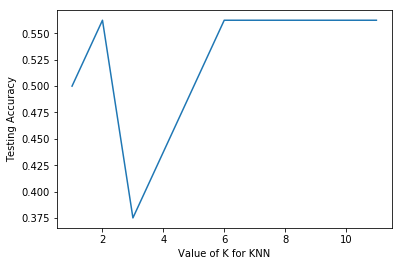

In [31]:
k_range = list(range(1, int(len(X_train)/2)))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook   # <- I don't get this. Perhaps old style?
#%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')